In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()       
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df["label"] = iris.target         
 
input_data = df.iloc[:,:-1].values #最後以外
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
def kmeans(k, X, max_iter=300):
    X_size,n_features = X.shape
    # ランダムに重心の初期値を初期化
    centroids  = X[np.random.choice(X_size,k)]
    
    # 前の重心と比較するために、仮に新しい重心を入れておく配列を用意
    new_centroids = np.zeros((k, n_features))
    
    # 各データ所属クラスタ情報を保存する配列を用意
    cluster = np.zeros(X_size)
    
    for epoch in range(max_iter):
        for i in range(X_size):
            # データから各重心までの距離を計算
            distances = np.sum((centroids - X[i]) ** 2, axis=1)
            
            # データの所属クラスタを距離の一番近い重心を持つものに更新
            cluster[i] = np.argsort(distances)[0]
            
        # すべてのクラスタに対して重心を再計算
        for j in range(k):
            new_centroids[j] = X[cluster==j].mean(axis=0)
            
        # 重心が変わっていなかったら終了
        if np.sum(new_centroids == centroids) == k:
            print("break")
            break
        centroids =  new_centroids
    return cluster

Text(0.5, 1.0, 'clustering relust')

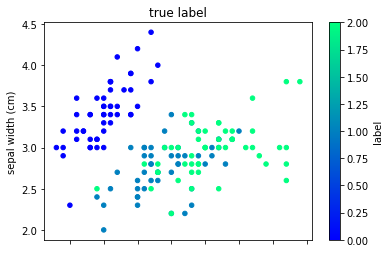

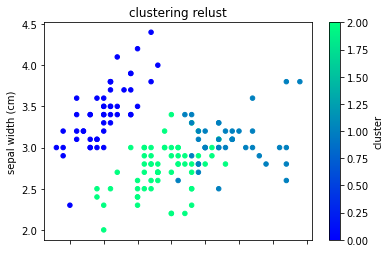

In [7]:
cluster=kmeans(3, input_data)
df["cluster"] = cluster
df.plot(kind="scatter", x=0,y=1,c="label", cmap="winter") 
plt.title("true label")

df.plot(kind="scatter", x=0,y=1,c="cluster", cmap="winter")
plt.title("clustering relust")

クラスター分析の分類

・ハードクラスタリング...各データは1つのクラスタに完全に属しているか否かの二択。

・ソフトクラスタリング

・階層的クラスタリング

  ・凝集型階層的クラスタリング

        ウォード法
  ・分割型階層的クラスタリング

・非階層的クラスタリング

         k-means


参考
https://www.sejuku.net/blog/64365

